# Project Description


Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

The goal of the project is to determine will the client subscribe a bank term deposit 

# Exploratory Data Analysis

First we read the dataset into dataframe. Notice that the dataset is a csv file but separated by `;`

In [42]:
import pandas as pd

df = pd.read_csv("./dataset/bank-additional/bank-additional.csv",sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Drop column __duration__, according to UCI:    

> ` this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.`

In [43]:
df.drop(columns="duration")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Some ML algorithms do not work well with categorical data, therefore, we need to convert those categorical data to number.

There are several features that are strictly __nominal__, perform **One Hot Encoder** on these features. Some features are __ordinal__, with these features, we perform **Ordinal Encoder**.

In [44]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ordering array from low to high
# The first element has lowest priority, the last element has highest priority
# This ranking is important!!
education = ["illiterate", "basic.4y", "basic.6y", "basic.9y",
             "unknown", "high.school", "professional.course", "university.degree"]

credit_default = ["yes", "unknown", "no"]

poutcome = ["failure", "nonexistent", "success"]

columnTransformer = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), [
         "job", "marital", "contact", "housing", "loan"]),
        ("EducationOrdinalEncoder", OrdinalEncoder(
            categories=[education, credit_default, poutcome]),
            ["education", "default", "poutcome"]),
    ]
)

transformed_df = pd.DataFrame(
    columnTransformer.fit_transform(df).toarray(),
    columns=columnTransformer.get_feature_names_out()
)

# Need to find out a way to feature engineering day and month
# Cannot use label encoding these data are cyclical data in nature
# Refer https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html
# Also, should housing and loan be in encoded using OrdinalEncoder or OneHotEncoder?
# I feel like there is no direct ranking between them so to play it safe, I use OneHotEncoder for it


Visualizing distribution of categorical features and label using pie chart


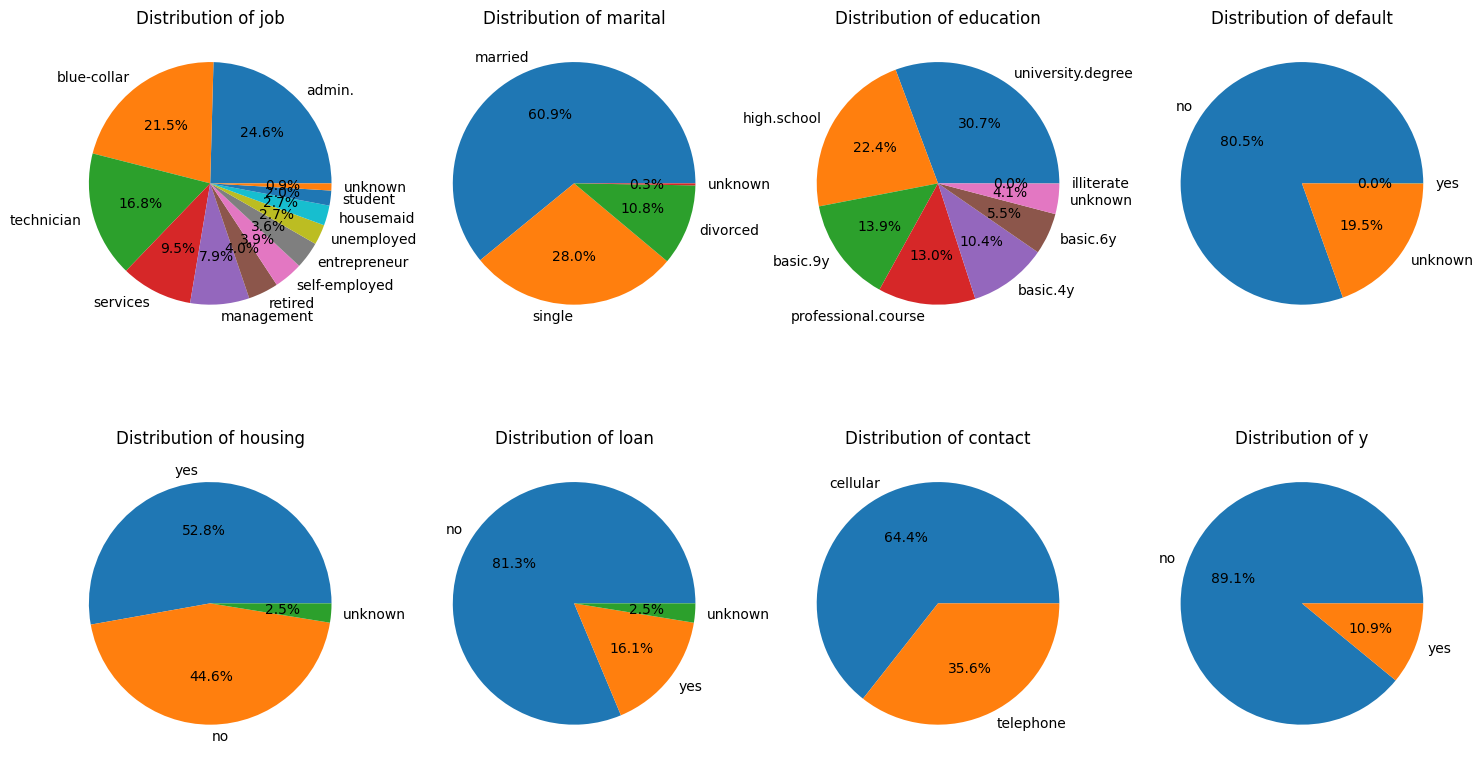

In [45]:
import matplotlib.pyplot as plt

pie_visualization = ["job", "marital", "education",
                     "default", "housing", "loan", "contact", "y"]

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for i, ax in enumerate(axes.flat, start=0):
    feature = pie_visualization[i]
    category = df[feature].value_counts()
    ax.set_title("Distribution of {}".format(feature))
    ax.pie(category, labels=category.index, autopct='%1.1f%%')
